In [1]:
import numpy as np
import pandas as pd

In [2]:
path = r"diabetes.csv"

df = pd.read_csv(path)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
x = df[["Pregnancies","Glucose","BMI","Age"]]
y = df["Outcome"]

In [5]:
x.head(10)

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
5,5,116,25.6,30
6,3,78,31.0,26
7,10,115,35.3,29
8,2,197,30.5,53
9,8,125,0.0,54


In [6]:
y.head(10)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [8]:
x_train

,Pregnancies,Glucose,BMI,Age
504,3,96,37.3,40
355,9,165,30.4,49
216,5,109,35.8,25
99,1,122,49.7,31
242,3,139,25.6,22
...,...,...,...,...
607,1,92,19.5,25
376,0,98,25.2,22
305,2,120,39.7,29
709,2,93,38.0,23


In [9]:
x_test

,Pregnancies,Glucose,BMI,Age
488,4,99,25.6,28
306,10,161,25.5,47
267,2,128,40.0,24
299,8,112,23.6,58
300,0,167,32.3,30
...,...,...,...,...
187,1,128,32.0,33
444,4,117,29.7,30
230,4,142,44.0,22
418,1,83,18.2,27


In [10]:
from sklearn.preprocessing import StandardScaler
# Feature scaling using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
x_test

array([[ 4.69647867e-02, -6.61262582e-01, -8.40521891e-01,
        -4.41870024e-01],
       [ 1.87010386e+00,  1.30691875e+00, -8.53590781e-01,
         1.19635667e+00],
       [-5.60748236e-01,  2.59338365e-01,  1.04139828e+00,
        -7.86759855e-01],
       [ 1.26239083e+00, -2.48579399e-01, -1.10189969e+00,
         2.14480370e+00],
       [-1.16846126e+00,  1.49738791e+00,  3.50937420e-02,
        -2.69425109e-01],
       [-5.60748236e-01, -1.04220090e+00,  8.73693022e-02,
        -7.00537397e-01],
       [-8.64604748e-01,  7.35511268e-01, -2.52421839e-01,
        -8.72982312e-01],
       [-1.16846126e+00,  6.72021547e-01,  4.81626320e-02,
        -9.59204770e-01],
       [-5.60748236e-01, -2.48579399e-01, -9.18935232e-01,
        -7.86759855e-01],
       [-1.16846126e+00,  4.49807526e-01, -7.35970771e-01,
        -1.04542723e+00],
       [ 6.54677810e-01, -1.53344818e-01,  2.18058203e-01,
         5.92799466e-01],
       [-5.60748236e-01, -8.83476603e-01, -2.52421839e-01,
      

In [13]:
y_test

488    0
306    1
267    0
299    0
300    1
      ..
187    1
444    1
230    1
418    0
516    1
Name: Outcome, Length: 231, dtype: int64

In [14]:
i = model.predict_proba([[4,141,27.6,40]])
print(i)

[[0. 1.]]


In [15]:
i = model.predict([[4,141,27.6,40]])
print(i)

[1]


In [16]:
i = model.predict_proba([[13,106,34.2,52]])
print(i)

[[0. 1.]]


In [17]:
accuracy = model.score(x_test,y_test)
print(accuracy)

0.7878787878787878


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions
y_pred = model.predict(x_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [20]:
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       149
           1       0.74      0.62      0.68        82

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



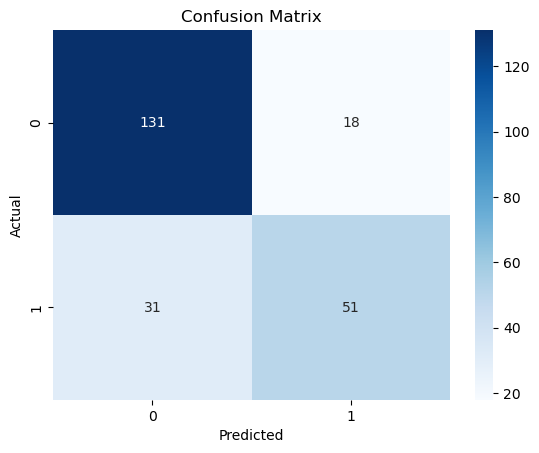

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()